In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/f5/d0/2e455d894ec0d6527e662ad55e70c04f421ad83a6fd0a54c3dd73c411282/opencv_python-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 715.8 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 38.4 kB/s eta 0:00:00m eta 0:00:010:00:19m
DEPRECATION: pandas 0.23.4 has a non-standard dependency specifier pytz>=2011k. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.1
    Uninstalling numpy-1.15.1:
      Successfully uninstalled numpy-1.15.1


In [16]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import IPython.display as ipd
from tqdm import tqdm
import subprocess   #subprocess:- used to convert video to comfortable format
plt.style.use('ggplot')

In [17]:
input_file="video (2160p).mp4"
subprocess.run(["ffmpeg","-i",input_file,"video_2.mp4","-loglevel","quiet"])

CompletedProcess(args=['ffmpeg', '-i', 'video (2160p).mp4', 'video_2.mp4', '-loglevel', 'quiet'], returncode=1)

In [23]:
ipd.Video("video (2160p).mp4")

In [24]:
pip install opencv-contrib-python


The following command must be run outside of the IPython shell:

    $ pip install opencv-contrib-python

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [ ]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [ ]:
#video height and width
height=cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width=cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f"height{height},width{width}")

In [ ]:
#get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"FPS:{fps:0.2f}")

In [ ]:
cap.release()

In [27]:
cap=cv2.VideoCapture("video_2.mp4")
ret,img=cap.read()
print(f"Returned {ret} and img of shape {img.shape}")

Returned True and img of shape (720, 1280, 3)


In [28]:
def display_cv2_image(image,figsize=(10,10)):
  img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  fig,ax=plt.subplots(figsize=figsize)
  ax.imshow(img)
  ax.axis("off")

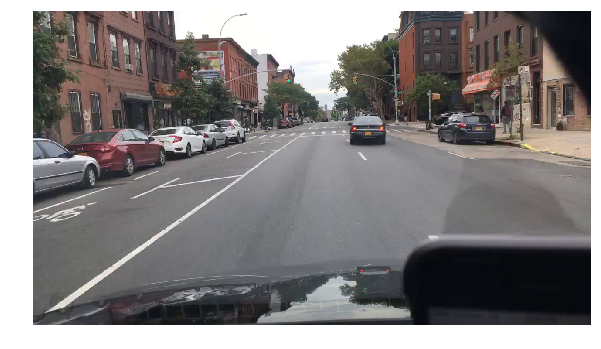

In [29]:
display_cv2_image(img)

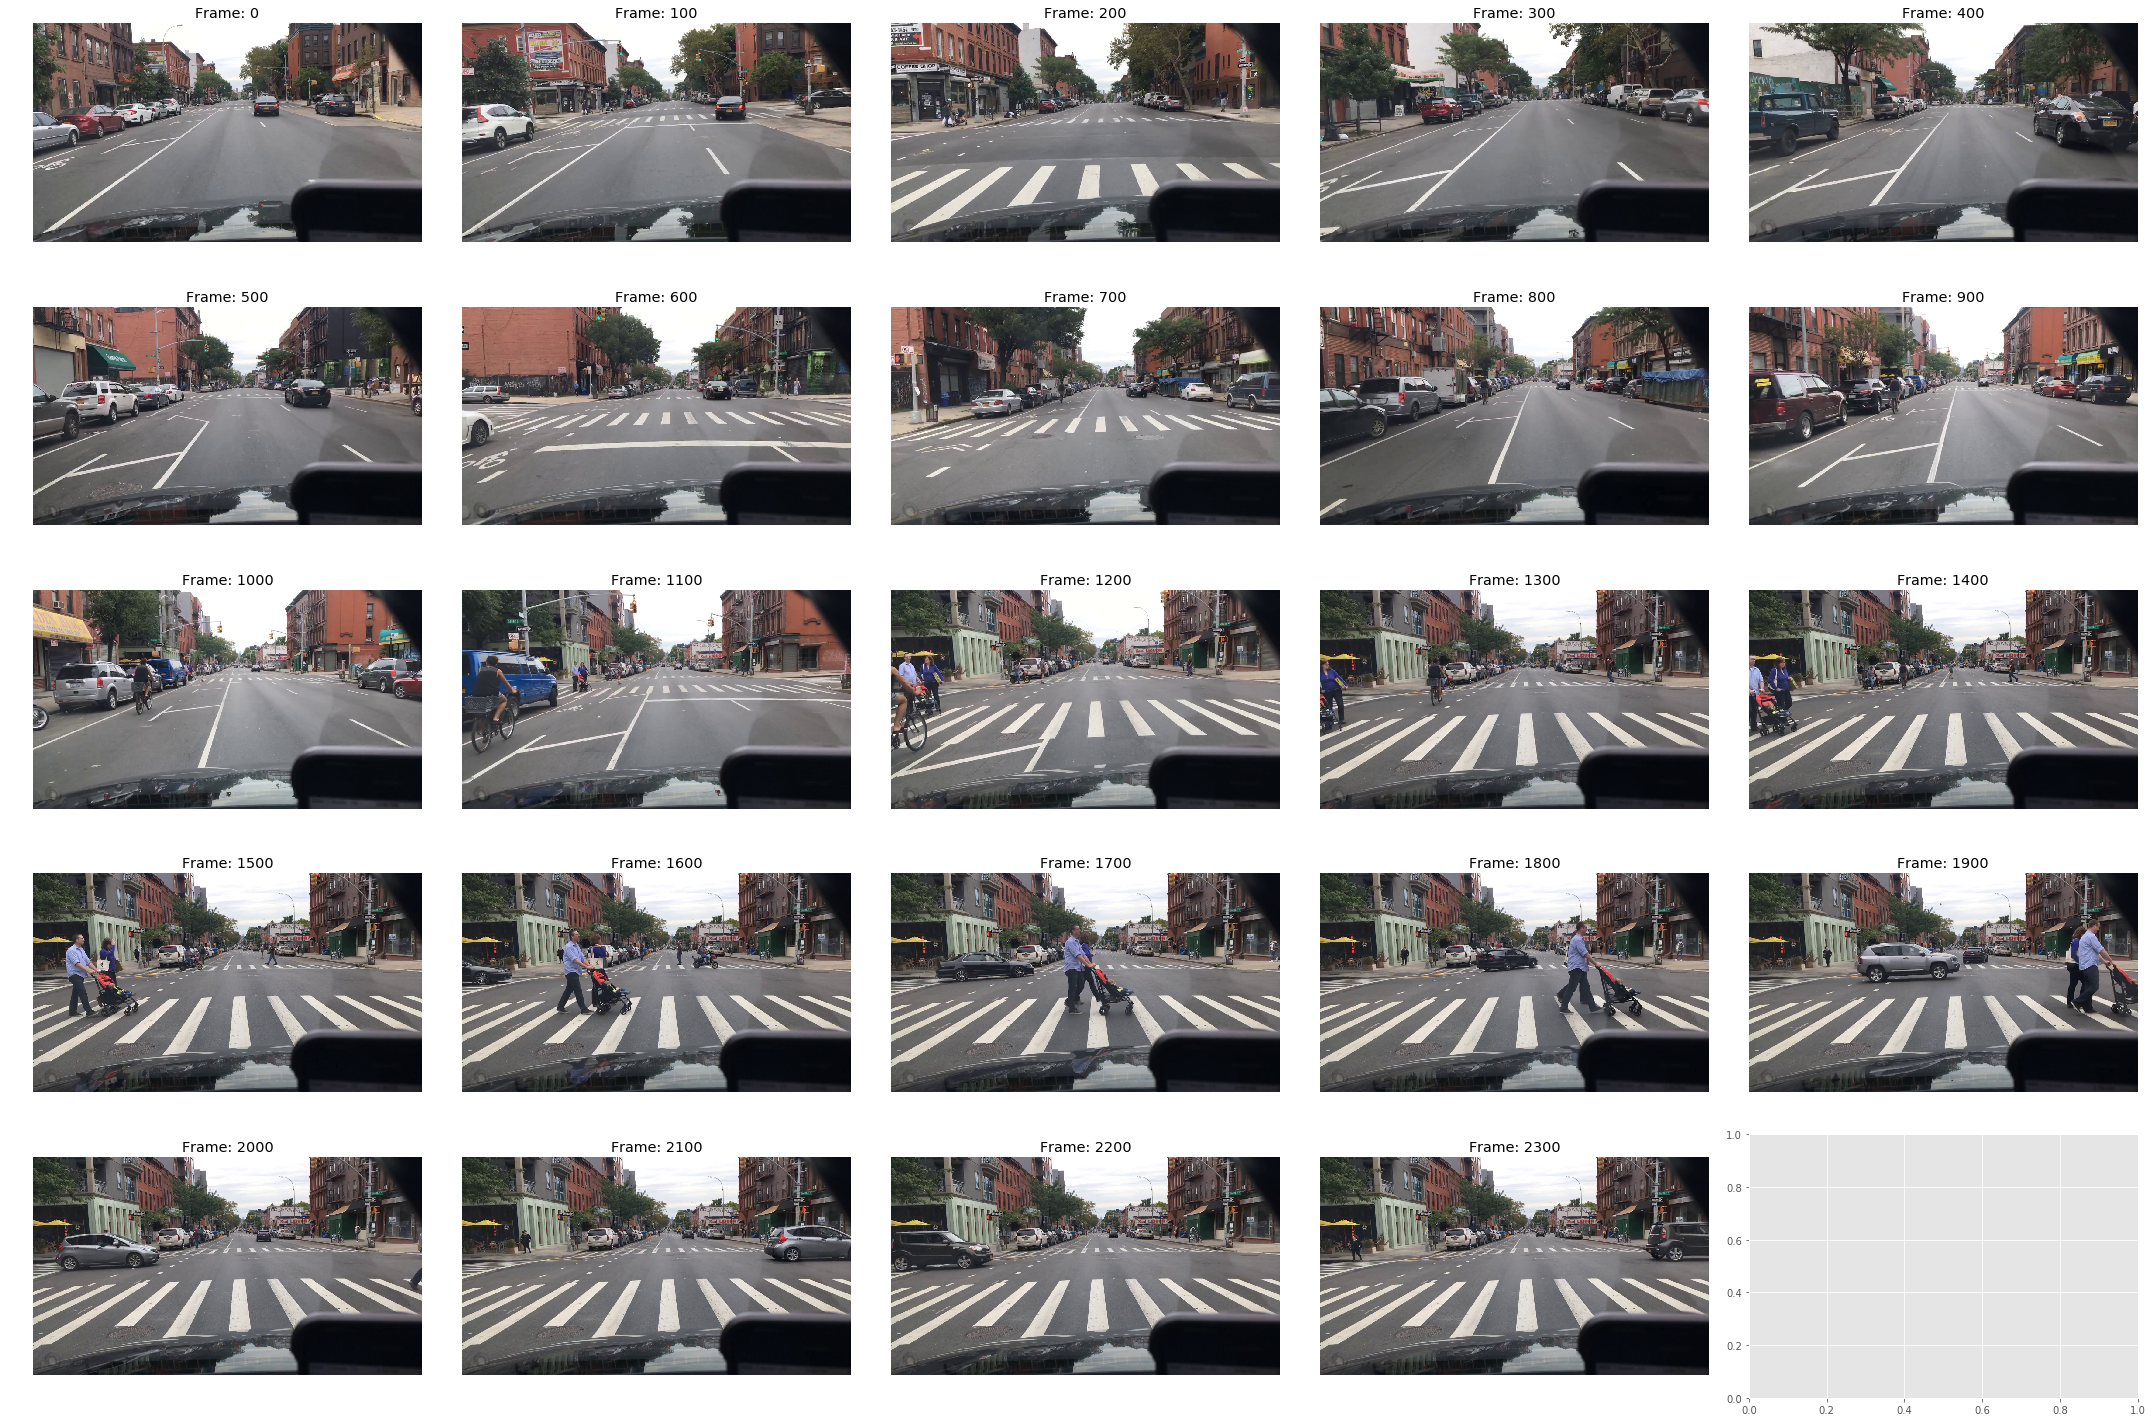

In [33]:
fig,axs=plt.subplots(5,5,figsize=(30,20))
axs=axs.flatten()
cap=cv2.VideoCapture("video_2.mp4")
n_frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx=0
for frame in range(n_frames):
  ret,img=cap.read()
  if ret==False:
    break
  if frame % 100==0:
    axs[img_idx].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    axs[img_idx].set_title(f"Frame: {frame}")
    axs[img_idx].axis("off")
    img_idx+=1
plt.tight_layout()
plt.show()
cap.release()

In [ ]:
#add annotations to video images
labels=pd.read_csv("",low_memory=False)
video_labels=(labels.query('videoName == "video_2.mp4"').reset_index(drop=True).copy())
video_labels["video_frame"]=(video_labels["frameIndex"]*11.9).round().astype("int")

In [ ]:
labels

In [ ]:
img_example=img.copy()
frame_labels=video_labels.query("video_frame==1035")
for i,d in frame_labels.iterrows():
    pt1=int(d["box2d.x1"]),int(d["box2d.y1"])
    pt2=int(d["box2d.x2"]),int(d["box2d.y2"])
    cv2.rectangle(img_example.pt1,pt2,(0,0,255),3)
display_cv2_img(img_example)